## 31. Аппроксимация данных. Логистическая функция. 
[Weiner B. Discovering Psychology. 1977]

В таблице представлены средние значения количества слов $y$, которыми владеет ребенок в заданном возрасте $x$.
```
 1.0        3
 1.5       22
 2.0      272
 2.5      446
 3.0      896
 3.5     1222
 4.0     1540
 4.5     1870
 5.0     2072
 6.0     2562
```
Построить линейную $y = \beta_0 + \beta_1 x$ и две логистические модели: 
$$
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},
$$
аппроксимирующие данные.    
Найти общую ошибку в каждом из этих случаев и сравнить результаты.  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import linalg
from scipy import optimize

# Данные и их визуализация
```
$x$ - возраст.
$y$ - среднее количество слов в зависимоти от возраста.
```

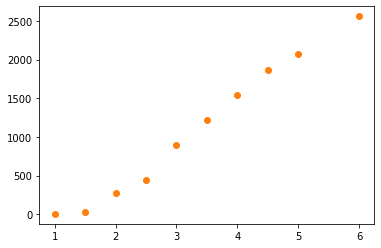

In [258]:
X = np.stack((np.ones(m), x)).T
x = np.array([1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0])
y = np.array([3,22,272,446,896,1222,1540,1870,2072,2562])
m = len(x)
plt.plot(x,y,'o',color = 'tab:orange')
pass

функции

In [259]:
def fun_one(t, b0,b1):
    return b0 + t * b1

In [260]:
def fun_two(t, b0,b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * t))

In [15]:
def fun_three(t,t0,b0, b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * (t - t0)))

# Подбор значения параметров
Первая модель является линейной, поэтому использую функцию polyfit().

In [248]:
alpha = np.polyfit(x, y, 1)
alpha2, alpha1 = alpha
alpha1, alpha2

(-763.8571428571419, 561.9264069264067)

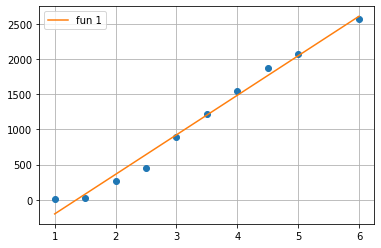

In [249]:
tt = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(tt, fun_one(tt,alpha1,alpha2), label='fun 1')
plt.legend()
plt.grid()
pass

## Нейлинейный метод наименьших квадратов
Для второй и третьей модели я использую метод наименьших квадратов, который реализован в функции curve_fit модуля numpy.optimize.

In [250]:
s2 = [1,2,3]
params1, _ = optimize.curve_fit(fun_two, x, y, s2)
beta0, beta1, beta2 = params1
beta0, beta1, beta2

(2612.693117576391, 95.76932605651045, 1.2364085878085078)

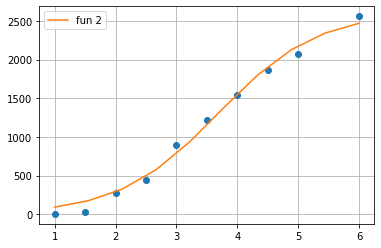

In [251]:
tt = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(tt, fun_two(tt, beta0, beta1, beta2), label='fun 2')
plt.legend()
plt.grid()
pass

In [252]:
s3 = [1, 2, 1000, 0.000001]
params2, _ = optimize.curve_fit(fun_three, x, y, s3, maxfev = 1000)
y0, gama0, gama1, gama2 = params2
y0, gama0, gama1, gama2

(1.2856394374611508, 2612.692705797321, 19.538236709446767, 1.2364130098739303)

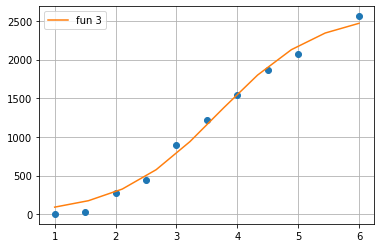

In [253]:
tt = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(tt, fun_three(tt,y0, gama0,  gama1, gama2), label='fun 3')
plt.legend()
plt.grid()
pass

все три модели нарисуем на одной координатой плоскости для наглядности и сравнения 

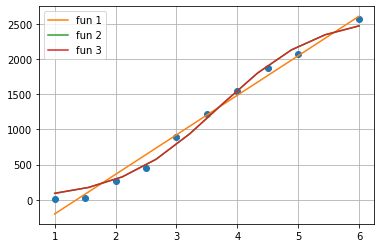

In [254]:
tt = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(tt, fun_one(tt,alpha1,alpha2), label='fun 1')
plt.plot(tt, fun_two(tt, beta0, beta1, beta2), label='fun 2')
plt.plot(tt, fun_three(tt,y0, gama0,  gama1, gama2), label='fun 3')
plt.legend()
plt.grid()
pass

# Общая ошибка в каждом из этих случаев

In [261]:
error1 = np.array (y - fun_one(x, alpha1, alpha2))**2
np.sum(error1)/m

10903.27748917749

In [262]:
error2 = np.array (y - fun_two(x, beta0,beta1,beta2))**2
np.sum(error2)/m

6971.830188795667

In [263]:
error2 = np.array (y - fun_three(x, y0, gama0,gama1,gama2))**2
np.sum(error2)/m

6971.830194447544

# Вывод
1) Линейная модель хуже  аппроксимирует  данные, чем логистические. Это так же видно на графиках функций, особенно на меньшх значениях x и y.
2) Обе логистические модели одинаково  аппроксимируют  данные, отличие незначительное.